<a href="https://colab.research.google.com/github/SMRayeed/Paleo-Data-Classification/blob/main/03_Data_Visualization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder_path = '/content/drive/MyDrive/AI4C-Project/'
files = os.listdir(folder_path)

In [4]:
for ix in files :
  if "merge" in ix and "csv" in ix :
    filepath = folder_path+ix

In [5]:
print(filepath)

/content/drive/MyDrive/AI4C-Project/merged_df.csv


In [6]:
df = pd.read_csv(filepath)

In [7]:
df.head(3)

,index,1,2,3,4,5,6,7,8,9,...,2021,2022,2023,site,loc,N,S,E,W,species
0,GRM101_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.1667,45.1667,-109.5167,-109.5167,PIAL
1,GRM107_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.1667,45.1667,-109.5167,-109.5167,PIAL
2,GRM108_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.1667,45.1667,-109.5167,-109.5167,PIAL


In [8]:
top_species = df['species'].value_counts().nlargest(5)

In [9]:
print("5 Most Frequent PINE Species")
print("============================")
for species, count in top_species.items() :
    print(f"Species: {species}\t Count: {count}")

5 Most Frequent PINE Species
Species: PIED	 Count: 5024
Species: PIPA	 Count: 1961
Species: PIFL	 Count: 1882
Species: PIEC	 Count: 1469
Species: PIJE	 Count: 984


In [10]:
species_counts = df['species'].value_counts()

print("Distinct PINE Species (with Counts)")
print("===================================")
for species, count in species_counts.items():
    print(f"Species: {species}\t\tCount: {count}")

Distinct PINE Species (with Counts)
Species: PIED		Count: 5024
Species: PIPA		Count: 1961
Species: PIFL		Count: 1882
Species: PIEC		Count: 1469
Species: PIJE		Count: 984
Species: PIRE		Count: 921
Species: PIAL		Count: 818
Species: PICO		Count: 801
Species: PILO		Count: 728
Species: PIST		Count: 691
Species: PIMO		Count: 635
Species: PILA		Count: 483
Species: PIRI		Count: 374
Species: PITA		Count: 367
Species: PISP		Count: 348
Species: PISF		Count: 321
Species: PIAR		Count: 253
Species: PIBA		Count: 247
Species: PIEL		Count: 218
Species: PIAZ		Count: 127
Species: PIPU		Count: 58
Species: PIMA		Count: 58
Species: PIVI		Count: 31
Species: PIBN		Count: 28
Species: PIMR		Count: 27
Species: PICL		Count: 25
Species: PITO		Count: 23


    Species info
        PIED: Pinus edulis (Commonly known as Two-needle Pinyon)
        PIPA: Pinus palustris (Commonly known as Longleaf Pine)
        PIFL: Pinus flexilis (Commonly known as Limber Pine)
        PIEC: Pinus echinata (Commonly known as Shortleaf Pine)
        PIJE: Pinus jeffreyi (Commonly known as Jeffrey Pine)
        PIRE: Pinus resinosa (Commonly known as Red Pine)
        PIAL: Pinus albicaulis (Commonly known as Whitebark Pine)
        PICO: Pinus contorta (Commonly known as Lodgepole Pine)
        PILO: Pinus longaeva (Commonly known as Bristlecone Pine)
        PIST: Pinus strobiformis (Commonly known as Southwestern White Pine)
        PIMO: Pinus monticola (Commonly known as Western White Pine)
        PILA: Pinus lambertiana (Commonly known as Sugar Pine)
        PIRI: Pinus rigida (Commonly known as Pitch Pine)
        PITA: Pinus taeda (Commonly known as Loblolly Pine)
        PISP: Pinus sylvestris (Commonly known as Scots Pine)
        PISF: Pinus sabiniana (Commonly known as Gray Pine)
        PIAR: Pinus aristata (Commonly known as Rocky Mountain Bristlecone Pine)
        PIBA: Pinus balfouriana (Commonly known as Foxtail Pine)
        PIEL: Pinus elliottii (Commonly known as Slash Pine)
        PIAZ: Pinus azul (Commonly known as Blue Pine)
        PIPU: Pinus pumila (Commonly known as Siberian Dwarf Pine)
        PIMA: Pinus massoniana (Commonly known as Masson's Pine)
        PIVI: Pinus virginiana (Commonly known as Virginia Pine)
        PIBN: Pinus banksiana (Commonly known as Jack Pine)
        PIMR: Pinus muricata (Commonly known as Bishop Pine)
        PICL: Pinus cembroides (Commonly known as Mexican Pinyon)
        PITO: Pinus torreyana (Commonly known as Torrey Pine)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

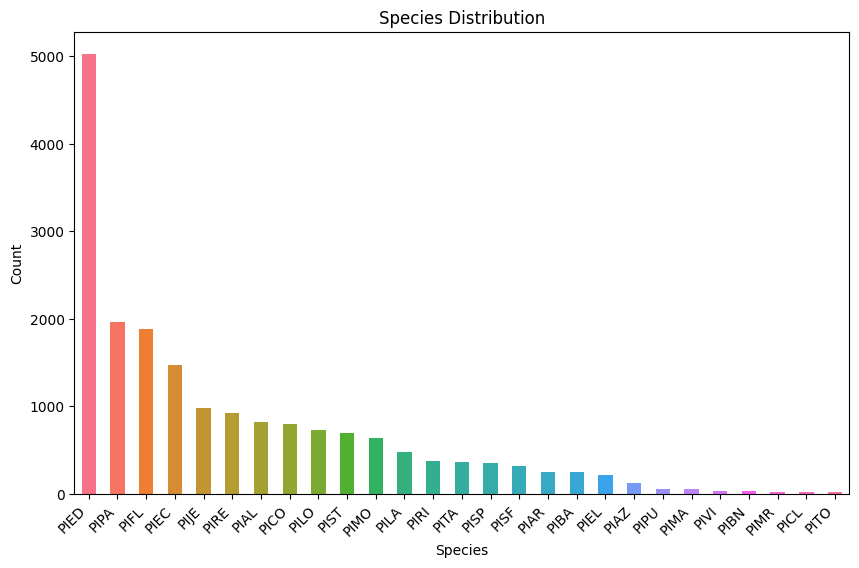

In [12]:
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(species_counts))
species_counts.plot(kind='bar', color=colors)
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

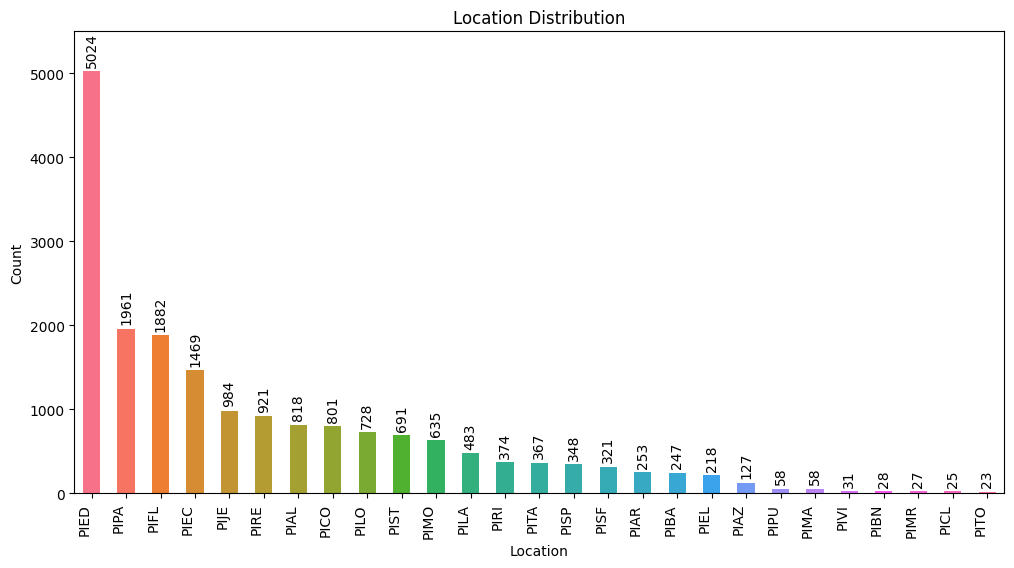

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(species_counts))
ax = species_counts.plot(kind='bar', color=colors)

for i, v in enumerate(species_counts):
    ax.text(i, v+50, str(v), rotation=90, ha='center', va='bottom')

plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.ylim(0,5500)
plt.show()

In [13]:
print(f'Avg. number of non-nan values for each tree : {(df.count(axis=1).mean()-1):.0f}')

Avg. number of non-nan values for each tree : 240


In [14]:
values_per_column = df.iloc[:,1:-7].count()

In [15]:
print("No. of Ring width Values per Year")
print('=================================')

for year, count in values_per_column.items() :
    print(f"Year (CE) : {year:<10} Count : {count}")

No. of Ring width Values per Year
Year (CE) : 1          Count : 11
Year (CE) : 2          Count : 11
Year (CE) : 3          Count : 11
Year (CE) : 4          Count : 11
Year (CE) : 5          Count : 11
Year (CE) : 6          Count : 11
Year (CE) : 7          Count : 11
Year (CE) : 8          Count : 11
Year (CE) : 9          Count : 11
Year (CE) : 10         Count : 11
Year (CE) : 11         Count : 11
Year (CE) : 12         Count : 11
Year (CE) : 13         Count : 11
Year (CE) : 14         Count : 11
Year (CE) : 15         Count : 11
Year (CE) : 16         Count : 11
Year (CE) : 17         Count : 11
Year (CE) : 18         Count : 11
Year (CE) : 19         Count : 11
Year (CE) : 20         Count : 11
Year (CE) : 21         Count : 11
Year (CE) : 22         Count : 12
Year (CE) : 23         Count : 12
Year (CE) : 24         Count : 12
Year (CE) : 25         Count : 12
Year (CE) : 26         Count : 13
Year (CE) : 27         Count : 13
Year (CE) : 28         Count : 13
Year (CE) : 29

In [30]:
top_100_columns = values_per_column.nlargest(100)

In [31]:
print("Top 100 Columns (Year) Data-wise")
print('================================')

for year, count in top_100_columns.items() :
    print(f"Year (CE) : {year:<10} Count : {count}")

Top 100 Columns (Year) Data-wise
Year (CE) : 1960       Count : 14021
Year (CE) : 1963       Count : 14018
Year (CE) : 1964       Count : 14009
Year (CE) : 1962       Count : 14008
Year (CE) : 1961       Count : 13996
Year (CE) : 1959       Count : 13993
Year (CE) : 1957       Count : 13974
Year (CE) : 1958       Count : 13974
Year (CE) : 1956       Count : 13954
Year (CE) : 1955       Count : 13930
Year (CE) : 1954       Count : 13913
Year (CE) : 1953       Count : 13890
Year (CE) : 1950       Count : 13853
Year (CE) : 1952       Count : 13845
Year (CE) : 1949       Count : 13839
Year (CE) : 1951       Count : 13821
Year (CE) : 1948       Count : 13807
Year (CE) : 1965       Count : 13807
Year (CE) : 1947       Count : 13774
Year (CE) : 1966       Count : 13737
Year (CE) : 1946       Count : 13725
Year (CE) : 1945       Count : 13678
Year (CE) : 1967       Count : 13672
Year (CE) : 1944       Count : 13642
Year (CE) : 1943       Count : 13603
Year (CE) : 1942       Count : 13553
Year 

In [32]:
top_100_columns_sorted = top_100_columns.sort_index()

In [33]:
print("Top 100 Columns (Year) Data-wise")
print('================================')

for year, count in top_100_columns_sorted.items() :
    print(f"Year (CE) : {year:<10} Count : {count}")

Top 100 Columns (Year) Data-wise
Year (CE) : 1880       Count : 11512
Year (CE) : 1881       Count : 11533
Year (CE) : 1882       Count : 11549
Year (CE) : 1883       Count : 11582
Year (CE) : 1884       Count : 11608
Year (CE) : 1885       Count : 11649
Year (CE) : 1886       Count : 11686
Year (CE) : 1887       Count : 11722
Year (CE) : 1888       Count : 11744
Year (CE) : 1889       Count : 11769
Year (CE) : 1890       Count : 11872
Year (CE) : 1891       Count : 11914
Year (CE) : 1892       Count : 11933
Year (CE) : 1893       Count : 11974
Year (CE) : 1894       Count : 12001
Year (CE) : 1895       Count : 12018
Year (CE) : 1896       Count : 12037
Year (CE) : 1897       Count : 12062
Year (CE) : 1898       Count : 12084
Year (CE) : 1899       Count : 12115
Year (CE) : 1900       Count : 12205
Year (CE) : 1901       Count : 12210
Year (CE) : 1902       Count : 12234
Year (CE) : 1903       Count : 12272
Year (CE) : 1904       Count : 12293
Year (CE) : 1905       Count : 12320
Year 

In [34]:
df

,index,1,2,3,4,5,6,7,8,9,...,2021,2022,2023,site,loc,N,S,E,W,species
0,GRM101_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
1,GRM107_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
2,GRM108_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
3,GRM109_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
4,GRM110_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18897,HMCWP14B_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST
18898,HMCWP15A_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST
18899,HMCWP15B_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST
18900,HMCWP16A_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST


In [42]:
df_250 = df.loc[:, ['index', 'site', 'loc', 'N', 'S', 'E', 'W', 'species'] + list(map(str, range(1745, 1995)))]

In [43]:
df_250

,index,site,loc,N,S,E,W,species,1745,1746,...,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994
0,GRM101_raw,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GRM107_raw,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GRM108_raw,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL,0.632,0.812,...,0.816,0.654,0.672,0.728,0.564,0.462,0.570,0.358,0.378,0.538
3,GRM109_raw,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL,1.146,1.016,...,0.686,0.548,0.688,0.644,0.390,0.368,0.454,0.244,0.254,0.502
4,GRM110_raw,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18897,HMCWP14B_raw,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST,NaN,NaN,...,6.800,6.290,4.160,3.310,3.750,3.160,3.060,2.800,2.660,3.310
18898,HMCWP15A_raw,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST,NaN,NaN,...,3.080,3.360,3.540,3.550,4.480,3.900,3.500,3.010,2.600,2.220
18899,HMCWP15B_raw,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST,NaN,NaN,...,2.860,3.120,3.470,4.970,5.340,4.020,3.710,2.870,2.110,1.830
18900,HMCWP16A_raw,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST,NaN,NaN,...,1.680,1.410,1.300,1.670,2.390,1.660,1.860,1.830,1.750,1.550


In [44]:
df_250 = df_250.reindex(['index'] + list(map(str, range(1745, 1995))) + ['site', 'loc', 'N', 'S', 'E', 'W', 'species'], axis=1)

In [45]:
df_250

,index,1745,1746,1747,1748,1749,1750,1751,1752,1753,...,1992,1993,1994,site,loc,N,S,E,W,species
0,GRM101_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
1,GRM107_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
2,GRM108_raw,0.632,0.812,0.804,0.784,0.714,0.582,1.034,0.846,0.922,...,0.358,0.378,0.538,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
3,GRM109_raw,1.146,1.016,1.292,1.244,1.136,1.202,1.124,0.966,0.660,...,0.244,0.254,0.502,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
4,GRM110_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Grass Mountain #1,Montana,45.166700,45.166700,-109.51670,-109.51670,PIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18897,HMCWP14B_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.800,2.660,3.310,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST
18898,HMCWP15A_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.010,2.600,2.220,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST
18899,HMCWP15B_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.870,2.110,1.830,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST
18900,HMCWP16A_raw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.830,1.750,1.550,Huron Mountain Club 2,Michigan,46.895333,46.825383,-87.80975,-87.80975,PIST


In [56]:
nan_counts_per_column = df_250.isna().sum()
non_nan_counts_per_column = df_250.count()

In [55]:
print("NaN Values per Column (Year)")
print("============================")

for year, count in nan_counts_per_column.items() :
    print(f"Year : {year:<7} Count : {count}")

NaN Values per Column (Year)
Year : index   Count : 0
Year : 1745    Count : 11364
Year : 1746    Count : 11331
Year : 1747    Count : 11302
Year : 1748    Count : 11273
Year : 1749    Count : 11250
Year : 1750    Count : 11183
Year : 1751    Count : 11172
Year : 1752    Count : 11154
Year : 1753    Count : 11124
Year : 1754    Count : 11109
Year : 1755    Count : 11084
Year : 1756    Count : 11065
Year : 1757    Count : 11047
Year : 1758    Count : 11010
Year : 1759    Count : 10992
Year : 1760    Count : 10926
Year : 1761    Count : 10911
Year : 1762    Count : 10885
Year : 1763    Count : 10849
Year : 1764    Count : 10820
Year : 1765    Count : 10795
Year : 1766    Count : 10778
Year : 1767    Count : 10759
Year : 1768    Count : 10739
Year : 1769    Count : 10726
Year : 1770    Count : 10661
Year : 1771    Count : 10645
Year : 1772    Count : 10624
Year : 1773    Count : 10616
Year : 1774    Count : 10598
Year : 1775    Count : 10569
Year : 1776    Count : 10557
Year : 1777    Cou

In [59]:
print("Non-NaN Count per Column (Year)")
print("===============================")

for year, count in non_nan_counts_per_column.items() :
    print(f"Year : {year:<10} Count : {count}")

Non-NaN Count per Column (Year)
Year : index      Count : 18902
Year : 1745       Count : 7538
Year : 1746       Count : 7571
Year : 1747       Count : 7600
Year : 1748       Count : 7629
Year : 1749       Count : 7652
Year : 1750       Count : 7719
Year : 1751       Count : 7730
Year : 1752       Count : 7748
Year : 1753       Count : 7778
Year : 1754       Count : 7793
Year : 1755       Count : 7818
Year : 1756       Count : 7837
Year : 1757       Count : 7855
Year : 1758       Count : 7892
Year : 1759       Count : 7910
Year : 1760       Count : 7976
Year : 1761       Count : 7991
Year : 1762       Count : 8017
Year : 1763       Count : 8053
Year : 1764       Count : 8082
Year : 1765       Count : 8107
Year : 1766       Count : 8124
Year : 1767       Count : 8143
Year : 1768       Count : 8163
Year : 1769       Count : 8176
Year : 1770       Count : 8241
Year : 1771       Count : 8257
Year : 1772       Count : 8278
Year : 1773       Count : 8286
Year : 1774       Count : 8304
Year :

In [70]:
sites = df_250['site'].value_counts()
locs = df_250['loc'].value_counts()

In [71]:
print(f'Total number of sites     : {len(sites)}')
print(f'Total number of locations : {len(locs)}')

Total number of sites     : 438
Total number of locations : 37


In [78]:
print(" " * ((80 - len("Tree/Row Count in Every Site")) // 2) + "Tree/Row Count in Every Site")
print("=" * 80)

for site, count in sites.items() :
    print(f" Site : {site:<60} Count : {count}")

                          Tree/Row Count in Every Site
 Site : Eagletown                                                    Count : 262
 Site : Bird Mountain                                                Count : 260
 Site : J.W. Jones Ecological Research Center                        Count : 242
 Site : Jemez-Santa Fe                                               Count : 240
 Site : Rifle                                                        Count : 231
 Site : Fort Grant Overlook Pinaleno Mountains                       Count : 213
 Site : Hopi Mesa                                                    Count : 211
 Site : Wild Rose                                                    Count : 198
 Site : Big Pine Key                                                 Count : 188
 Site : Dry Park                                                     Count : 180
 Site : Goethe State Forest                                          Count : 171
 Site : Unaweep Canyon                                

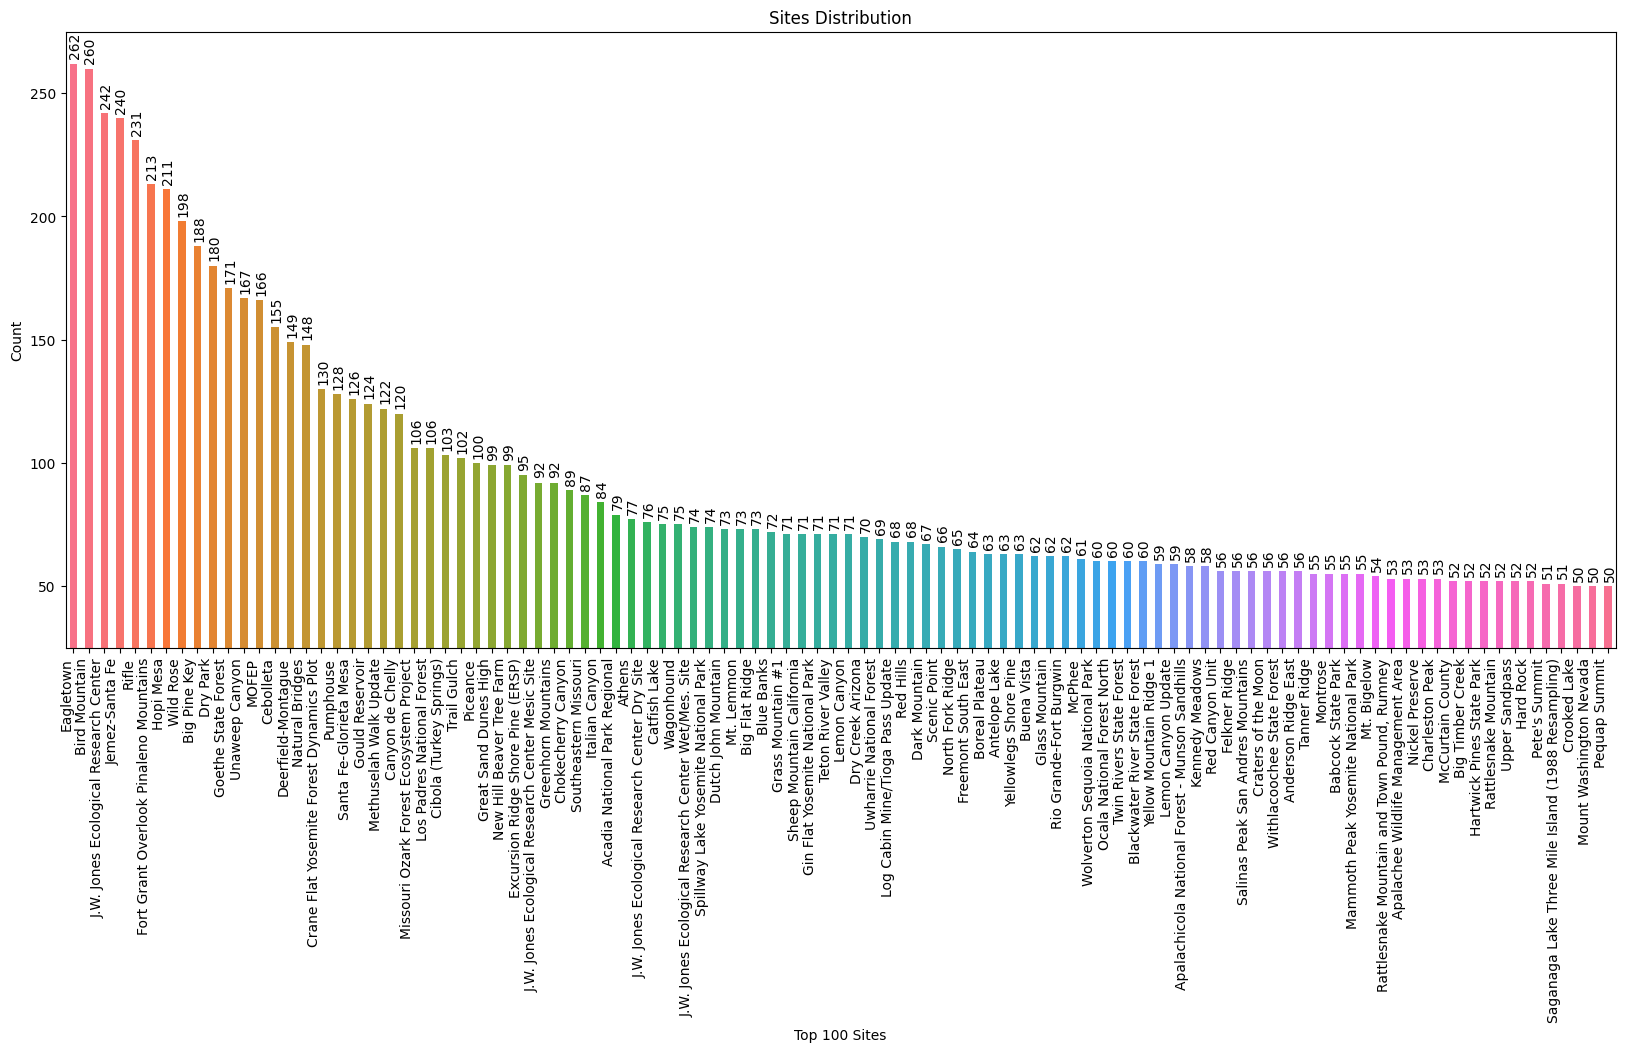

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

top_100_sites = sites.head(100)

sns.set_palette("pastel")
plt.figure(figsize=(20, 8))
colors = sns.color_palette("husl", len(top_100_sites))
ax = top_100_sites.plot(kind='bar', color=colors)

for i, v in enumerate(top_100_sites):
    ax.text(i+0.1, v+2, str(v), rotation=90, ha='center', va='bottom')

plt.title('Sites Distribution')
plt.xlabel('Top 100 Sites')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.ylim(25, 275)
plt.show()

In [85]:
print(" " * ((50 - len("Tree/Row Count in Every Location")) // 2) + "Tree/Row Count in Every Location")
print("=" * 50)

for loc, count in locs.items() :
    print(f" Location : {loc:<25} Count : {count}")

         Tree/Row Count in Every Location
 Location : California                Count : 2742
 Location : Colorado                  Count : 2550
 Location : New Mexico                Count : 1814
 Location : Arizona                   Count : 1568
 Location : Wyoming                   Count : 1060
 Location : Nevada                    Count : 927
 Location : Utah                      Count : 920
 Location : Florida                   Count : 875
 Location : Georgia                   Count : 740
 Location : North Carolina            Count : 619
 Location : Minnesota                 Count : 573
 Location : Montana                   Count : 566
 Location : Arkansas                  Count : 491
 Location : Oklahoma                  Count : 431
 Location : Missouri                  Count : 429
 Location : Michigan                  Count : 357
 Location : Maine                     Count : 296
 Location : New York                  Count : 233
 Location : Idaho                     Count : 198
 Lo

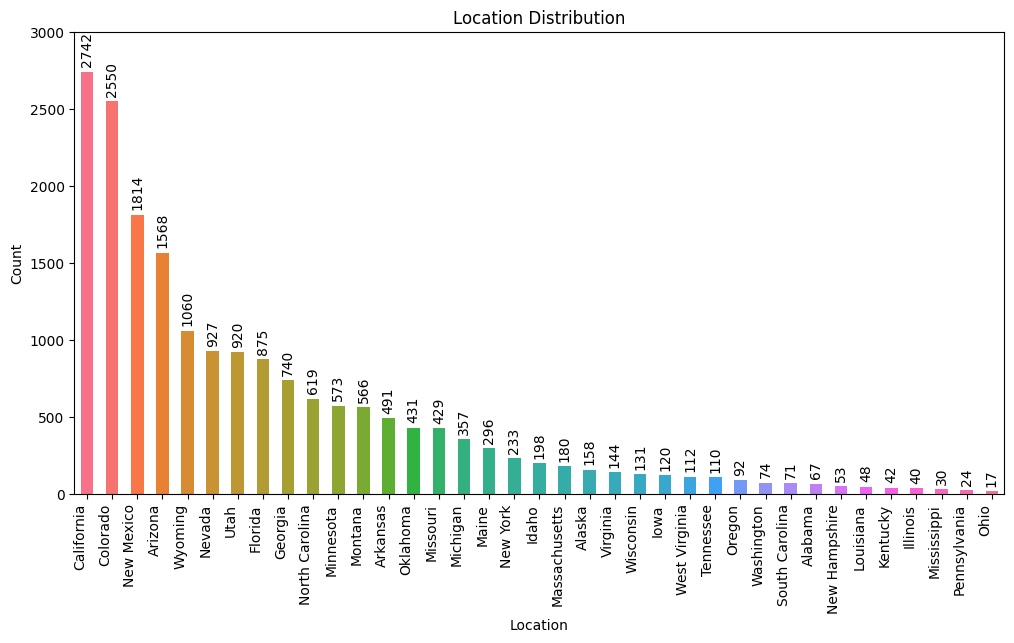

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")
plt.figure(figsize=(12, 6))
colors = sns.color_palette("husl", len(locs))
ax = locs.plot(kind='bar', color=colors)

for i, v in enumerate(locs):
    ax.text(i, v+30, str(v), rotation=90, ha='center', va='bottom')

plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.ylim(0,3000)
plt.show()